### 1. Import Dependencies

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 2. Read the dataset

In [5]:
df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\Dementia Prediction Dataset.csv", engine='python')
df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,NPATGAM1,NPATGAM2,NPATGAM3,NPATGAM4,NPATGAM5,NPATGFRN,NPATGFR1,NPATGFR2,NPATGFR3,NPATGFR4
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,-4,-4,-4,-4,-4,-4,-4,-4,-4,-4


In [26]:
non_medical_df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\processed/Initial_Data_Assessed.csv")

C:\Users\Mitheesha\AppData\Local\Temp\ipykernel_18180\4267504533.py:1: DtypeWarning: Columns (35,37,39,41,59,65,80,82,85,87,89,91,141,152) have mixed types. Specify dtype option on import or set low_memory=False.
  non_medical_df = pd.read_csv(r"D:\Study\Model X\Dementia Prediction\Dataset\processed/Initial_Data_Assessed.csv")


### 3. Target variable analysis

#### 3.1 Finding the Target Variable

In [27]:
# Find binary columns
binary_cols = [col for col in df.columns if df[col].dropna().nunique() == 2]

print("Binary columns in the dataset:")
print(binary_cols)

Binary columns in the dataset:
['SEX', 'NACCFADM', 'NACCFFTD', 'BEOTHR', 'NORMCOG', 'DEMENTED', 'IMPNOMCI', 'PARK', 'PSP', 'CORT', 'DOWNS', 'HUNT', 'PRION', 'BRNINJ', 'HYCEPH', 'NEOP', 'DEP', 'OTHPSY', 'DYSILL', 'MEDS', 'COGOTH', 'NACCADMU', 'NACCFTDM', 'NACCNORM', 'NACCDIED', 'NACCNURP', 'NACCFTD', 'NACCMDSS', 'NACCPAFF', 'NACCLBDM', 'NACCACSF', 'NACCPCSF', 'NACCTCSF', 'NACCMRSA', 'NACCAPSA', 'NACCNAPA', 'ADGCGWAS', 'ADGCEXOM', 'NGDSGWAS', 'NGDSEXOM', 'NGDSWGS', 'NGDSWES', 'NGDSWGAC', 'NGDSWEAC', 'NACCNCRD']


In [28]:
for col in binary_cols:
    print(col, df[col].dropna().unique())

SEX [1 2]
NACCFADM [0 1]
NACCFFTD [0 1]
BEOTHR [0 1]
NORMCOG [0 1]
DEMENTED [0 1]
IMPNOMCI [0 1]
PARK [0 1]
PSP [0 1]
CORT [0 1]
DOWNS [0 1]
HUNT [0 1]
PRION [0 1]
BRNINJ [1 0]
HYCEPH [0 1]
NEOP [0 1]
DEP [0 1]
OTHPSY [0 1]
DYSILL [1 0]
MEDS [0 1]
COGOTH [0 1]
NACCADMU [0 1]
NACCFTDM [0 1]
NACCNORM [0 1]
NACCDIED [0 1]
NACCNURP [0 1]
NACCFTD [0 1]
NACCMDSS [3 1]
NACCPAFF [0 1]
NACCLBDM [0 1]
NACCACSF [0 1]
NACCPCSF [0 1]
NACCTCSF [0 1]
NACCMRSA [0 1]
NACCAPSA [0 1]
NACCNAPA [0 1]
ADGCGWAS [0 1]
ADGCEXOM [0 1]
NGDSGWAS [0 1]
NGDSEXOM [0 1]
NGDSWGS [0 1]
NGDSWES [0 1]
NGDSWGAC ['88' 'NG00067']
NGDSWEAC ['88' 'NG00067']
NACCNCRD [0 1]


From the binary columns, "DEMENTED" is the most appropriate variable for the target

#### 3.2 Adding the Target Variable

In [29]:
non_medical_df['DEMENTED'] = df['DEMENTED']

In [30]:
non_medical_df.head()

,NACCID,NACCADC,PACKET,FORMVER,VISITMO,VISITDAY,VISITYR,NACCVNUM,NACCAVST,NACCNVST,...,BIPOLAR,SCHIZ,DEP2YRS,DEPOTHR,ANXIETY,OCD,NPSYDEV,PSYCDIS,PSYCDISX,DEMENTED
0,NACC002909,186,I,3.0,12,28,2022,1,2,2,...,0,0,0,0,1,0,9,0,NaN,0
1,NACC002909,186,F,3.0,1,23,2024,2,2,2,...,-4,-4,-4,-4,-4,-4,-4,-4,NaN,0
2,NACC003487,186,I,3.0,11,15,2023,1,1,1,...,0,0,0,0,0,0,0,0,NaN,0
3,NACC004352,186,I,3.0,10,5,2021,1,1,1,...,9,9,9,9,9,9,9,9,NaN,1
4,NACC004687,186,I,3.0,11,14,2022,1,1,1,...,0,0,0,0,0,0,0,0,NaN,0


### 4. Frequency Count

In [31]:
non_medical_df["DEMENTED"].value_counts()

DEMENTED
0    137606
1     57590
Name: count, dtype: int64

In [32]:
non_medical_df["DEMENTED"].value_counts(normalize=True) * 100

DEMENTED
0    70.496322
1    29.503678
Name: proportion, dtype: float64

#### 5. Visualization

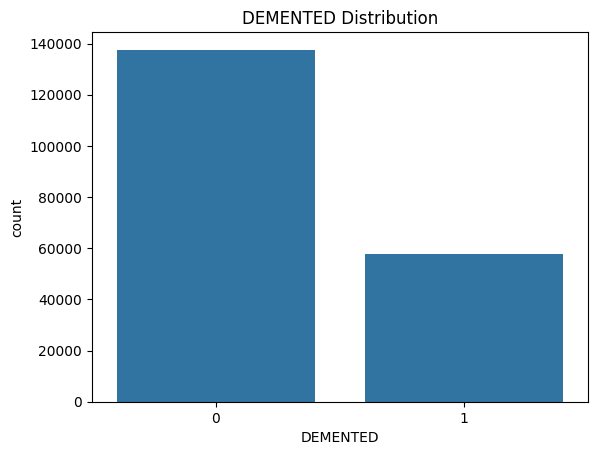

In [33]:
sns.countplot(x="DEMENTED", data=df)
plt.title("DEMENTED Distribution")
plt.show()

In [34]:
DEMENTED_rate = non_medical_df["DEMENTED"].value_counts(normalize=True)[1] * 100
print(f"DEMENTED_rate: {DEMENTED_rate:.2f}%")

DEMENTED_rate: 29.50%


In [36]:
non_medical_df.to_csv("D:\Study\Model X\Dementia Prediction\Dataset\processed/Target_Variable_Analysed.csv", index=False)